## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage.
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```):

--> double click to respond

Your full name:

--> double click to respond

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle.

#### Submitting your test result to Kaggle leaderboard
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [56]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

from torchvision import datasets

import os
import torch.optim as optim

In [3]:
# always check your version
print(torch.__version__)

2.2.1+cu118


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30.

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks)


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!--
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions?
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

# mounted on MyDrive
#!ls '/content/drive/'

Mounted at /content/drive
MyDrive


In [2]:
# TO COMPLETE
ROOT = 'C:\\Users\\aman1\\OneDrive\\Desktop\\Stuff\\Masters\\Semester 2\\Deep Learning\\Assignment\\Data\\comp5625M_data_assessment_1\\train_set\\'

DataPath = ROOT + 'train_set/'
ResultPath = ROOT + 'assignment_results/'

# make these directories if not available
# --> this will avoid you from downloading the data again and again
os.makedirs(DataPath, exist_ok=True)
os.makedirs(ResultPath, exist_ok=True)

In [199]:
class GetDataset(Dataset):
    def _init_(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

        for cls in self.classes:
            class_dir = os.path.join(root_dir, cls)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.images.append(image_path)
                self.labels.append(self.class_to_idx[cls])

    def _len_(self):
        return len(self.images)

    def _getitem_(self, idx):
        image_path = self.images[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label
    
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    #transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the image
])

dataset_train2 = datasets.ImageFolder(root=DataPath, transform= transform)

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    #transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the image
])

dataset_train = datasets.ImageFolder(root=DataPath, transform= transform)

In [5]:
torch.manual_seed(201711295)
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=64, shuffle=True)

In [200]:
torch.manual_seed(201711295)
train_loader2 = torch.utils.data.DataLoader(dataset_train2, batch_size=64, shuffle=True)

In [ ]:
for images, labels in train_loader:
    # Iterate over each image and its label in the batch

    for image, label in zip(images, labels):
        print(image.size())
        # Convert image tensor to numpy array
        #image_np = image.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)

        # Undo normalization to display the image
        #image_np = image_np * 0.5 + 0.5  # Undo normalization (assuming mean=0.5, std=0.5)

        # Print class label and display image
        #print("Class:", label.item())
        #plt.imshow(image_np)
        #plt.axis('off')
        #plt.show()
        pass

### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [9]:
# TO COMPLETE
# define a MLP Model class
class CustomMLP(nn.Module):
    def __init__(self, input_channels, input_height, input_width, hidden_units, output_units):
        super(CustomMLP, self).__init__()
        self.input_channels = input_channels
        self.input_height = input_height
        self.input_width = input_width
        self.hidden_units = hidden_units
        self.output_units = output_units

        # Calculate the total number of input features after flattening
        self.input_features = input_channels * input_height * input_width
        self.fc1 = nn.Linear(self.input_features, 2*hidden_units)
        #self.fc1 = nn.Linear(input_channels * input_height * input_width, hidden_units)  # First fully connected layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(2*hidden_units, hidden_units)  # Second fully connected layer
        self.relu2 = nn.ReLU() # ReLU activation function
        self.fc3 = nn.Linear(hidden_units, 30) # Output Layer

    def forward(self, x):
        x = x.view(-1, self.input_features)
        x = self.fc1(x)  # Pass input through first fully connected layer
        x = self.relu(x)  # Apply ReLU activation function
        x = self.fc2(x)  # Pass output of first layer through second fully connected layer
        x = self.relu2(x) # Apply ReLU activation function
        x = self.fc3(x) # Pass output of the 2nd layer to the final layer
        return x

# Example usage:
input_channels = 3  # Number of input channels (RGB)
input_height = 64  # Height of input images
input_width = 64  # Width of input images
hidden_units = 256  # Number of hidden units in the hidden layer
output_units = 30  # Number of output units (e.g., number of classes)

# Create an instance of the custom MLP model
model = CustomMLP(input_channels, input_height, input_width, hidden_units, output_units)

# Print model architecture
print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

CustomMLP(
  (fc1): Linear(in_features=12288, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=256, out_features=30, bias=True)
)


### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [4]:
if torch.cuda.is_available():
    # Get the name of the GPU
    device = torch.cuda.get_device_name(0)
    print("Using GPU:", device)
else:
    print("No GPU available, using CPU instead")

Using GPU: NVIDIA GeForce GTX 1660 Ti


In [30]:
# TO COMPLETE
# define a CNN Model class

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding = 1)  # First convolutional layer
        self.relu1 = nn.ReLU()  # ReLU activation function
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding = 1)  # Second convolutional layer
        self.relu2 = nn.ReLU()  # ReLU activation function
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding = 1)  # Third convolutional layer
        self.relu3 = nn.ReLU()  # ReLU activation function
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        self.flatten = nn.Flatten()  # Flatten layer
        self.fc1 = nn.Linear(128 * 8 * 8,256)  # First fully connected layer
        self.relu4 = nn.ReLU() # ReLU activation function
        self.fc2 = nn.Linear(256,64) # Second fully connected layer
        self.relu5 = nn.ReLU() # ReLU activation function
        self.fc3 = nn.Linear(64, 30)  # Third fully connected layer

    def forward(self, x):
        x = self.conv1(x)  # Pass input through first convolutional layer
        x = self.relu1(x)  # Apply ReLU activation function
        x = self.pool1(x)  # Apply max pooling
        x = self.conv2(x)  # Pass output of first layer through second convolutional layer
        x = self.relu2(x)  # Apply ReLU activation function
        x = self.pool2(x)  # Apply max pooling
        x = self.conv3(x)  # Pass output of second layer through third convolutional layer
        x = self.relu3(x)  # Apply ReLU activation function
        x = self.pool3(x)  # Apply max pooling
        x = self.flatten(x)  # Flatten the input tensor
        x = self.fc1(x)  # Pass flattened input through first fully connected layer
        x = self.relu4(x)  # Apply ReLU activation function
        x = self.fc2(x)  # Pass output of first layer through second fully connected layer
        x = self.relu5(x) # Apply ReLu activation function
        x = self.fc3(x) # Final fully connected layer
        return x

# Example usage:
model = CustomCNN()  # Create an instance of the custom CNN model

# Print model architecture
print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss function for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001


CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=8192, out_features=256, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (relu5): ReLU()
  (fc3): Linear(in_features=64, out_features=30, bias=True)
)


## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [17]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [6]:
from torch.utils.data import random_split
  
# Set random seed for reproducibility
torch.manual_seed(201711295)

# Assuming train_loader is your DataLoader containing the dataset
dataset = train_loader.dataset

# Define the sizes of training and validation sets (e.g., 80% training, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_indices = train_dataset.indices
val_indices = val_dataset.indices
# Create DataLoader for training and validation sets
train_loader_new = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader_new = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

In [37]:
#TO COMPLETE --> Running your MLP model class
torch.manual_seed(0)
import datetime
nepochs = 50   # number of epochs
net = CustomMLP(input_channels, input_height, input_width, hidden_units, output_units)       # MLP model
results_path = ResultPath + '/CustomMLP50epochs.pt'

# initialise ndarray to store the mean loss in each epoch (on the training data)
losses = np.zeros(nepochs)
validation_losses = []
train_acc = []
val_acc = []
# Use a loss function and optimiser provided as part of PyTorch.
# The chosen optimiser (Stochastic Gradient Descent with momentum) needs only to be given the parameters (weights and biases)
# of the network and updates these when asked to perform an optimisation step below.
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(nepochs):  # loop over the dataset multiple times

    # initialise variables for mean loss calculation
    running_loss = 0.0
    n = 0
    #print("Check-1 ",datetime.datetime.now())
    for data in train_loader_new:
        #print("Check0 ",datetime.datetime.now())
        inputs, labels = data
        # Zero the parameter gradients to remove accumulated gradient from a previous iteration.
        optimizer.zero_grad()
        # Forward, backward, and update parameters
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        # accumulate loss and increment minibatches
        running_loss += loss.item()
        n += 1
        #print(running_loss)

    # record the mean loss for this epoch and show progress
    losses[epoch] = running_loss / n
    train_acc_value = topk_accuracy(outputs,labels)
    tav = float(train_acc_value[0])/100
    train_acc.append(tav)
    #print(f"epoch: {epoch+1} loss: {losses[epoch] : .3f}")

    net.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for efficiency
        running_val_loss = 0.0
        val_n = 0
        for val_data in val_loader_new:  # Assuming you have a separate DataLoader for validation data
            val_inputs, val_labels = val_data
            val_outputs = net(val_inputs)
            val_loss = loss_fn(val_outputs, val_labels)
            running_val_loss += val_loss.item()
            val_n += 1
        val_loss = running_val_loss / val_n
        validation_losses.append(val_loss)
        val_acc_value = topk_accuracy(val_outputs,val_labels)
        vav = float(val_acc_value[0])/100
        val_acc.append(vav)
        #print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.3f}")
        print(f"epoch: {epoch + 1} training loss: {losses[epoch] : .3f} training accuracy: {tav: .1%}  Validation loss: {val_loss: .3f} Validation accuracy: {vav: .1%}")
    net.train()

# save network parameters and losses
torch.save({"state_dict": net.state_dict(), "losses_train": losses, "losses_validation":validation_losses,"val_acc":val_acc,"train_acc":train_acc}, results_path)

epoch: 1 training loss:  3.214 training accuracy:  2.1%  Validation loss:  3.050 Validation accuracy:  16.7%
epoch: 2 training loss:  2.941 training accuracy:  16.7%  Validation loss:  2.928 Validation accuracy:  8.3%
epoch: 3 training loss:  2.809 training accuracy:  10.4%  Validation loss:  2.874 Validation accuracy:  0.0%
epoch: 4 training loss:  2.735 training accuracy:  22.9%  Validation loss:  2.828 Validation accuracy:  8.3%
epoch: 5 training loss:  2.672 training accuracy:  22.9%  Validation loss:  2.831 Validation accuracy:  8.3%
epoch: 6 training loss:  2.626 training accuracy:  12.5%  Validation loss:  2.781 Validation accuracy:  8.3%
epoch: 7 training loss:  2.556 training accuracy:  31.2%  Validation loss:  2.844 Validation accuracy:  16.7%
epoch: 8 training loss:  2.508 training accuracy:  18.8%  Validation loss:  2.780 Validation accuracy:  16.7%
epoch: 9 training loss:  2.455 training accuracy:  16.7%  Validation loss:  2.741 Validation accuracy:  16.7%
epoch: 10 traini

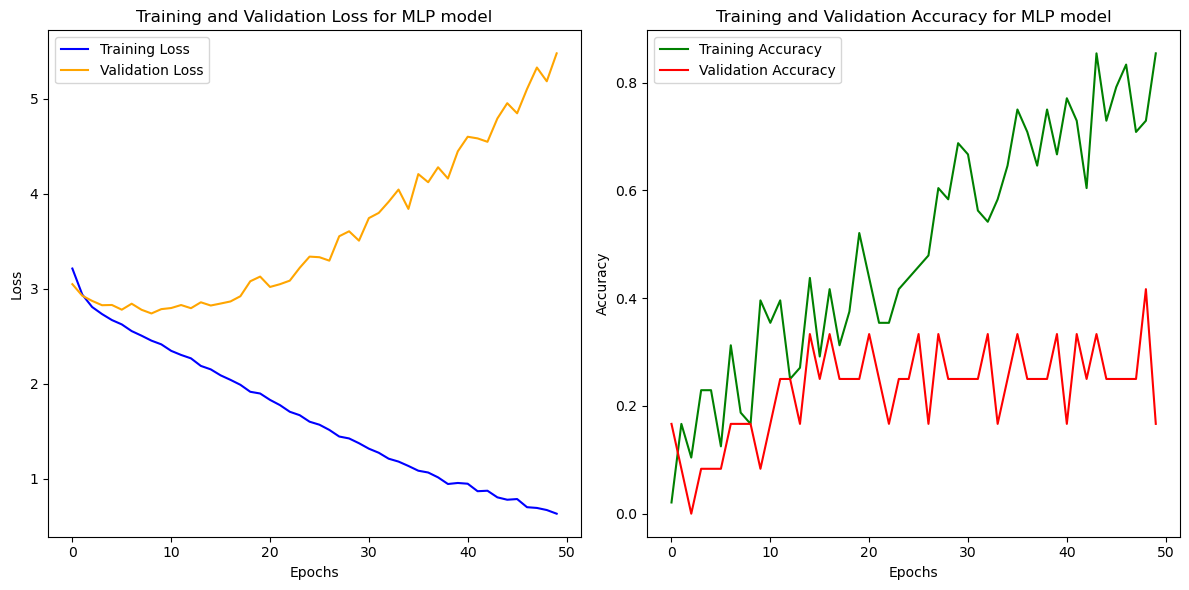

In [21]:
# Your graph
path = ResultPath + '/CustomMLP50epochs.pt'
checkpoint = torch.load(path)
training_loss = checkpoint['losses_train']
training_accuracy = checkpoint['train_acc']
validation_loss = checkpoint['losses_validation']
validation_accuracy = checkpoint['val_acc']

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


fig, stats = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss
stats[0].plot(training_loss, label='Training Loss', color='blue')
stats[0].plot(validation_loss, label='Validation Loss', color='orange')
stats[0].set_title('Training and Validation Loss for MLP model')
stats[0].set_xlabel('Epochs')
stats[0].set_ylabel('Loss')
stats[0].legend()


# Plot training and validation accuracy
stats[1].plot(training_accuracy, label='Training Accuracy', color='green')
stats[1].plot(validation_accuracy, label='Validation Accuracy', color='red')
stats[1].set_title('Training and Validation Accuracy for MLP model')
stats[1].set_xlabel('Epochs')
stats[1].set_ylabel('Accuracy')
stats[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [37]:
def stats(loader, net2):
    correct = 0
    total = 0
    running_loss = 0
    n = 0    # counter for number of minibatches
    with torch.no_grad():
        for data in loader:
            images, labels = data

            #to work with gpu you will need to load data and labels to gpu
            #images = images.to(device)
            #labels = labels.to(device)

            outputs = net2(images)

            # accumulate loss
            running_loss += loss_fn(outputs, labels)
            n += 1

            # accumulate data for accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)    # add in the number of labels in this minibatch
            correct += (predicted == labels).sum().item()  # add in the number of correct labels

    return running_loss/n, correct/total

In [71]:
def stats2(loader, net2):
    correct = 0
    total = 0
    running_loss = 0
    n = 0    # counter for number of minibatches
    with torch.no_grad():
        for data in loader:
            images, labels = data

            #to work with gpu you will need to load data and labels to gpu
            images = images.to('cuda')
            labels = labels.to('cuda')
            images, labels = images.cuda(), labels.cuda()

            outputs = net2(images)

            # accumulate loss
            running_loss += loss_fn(outputs, labels)
            n += 1

            # accumulate data for accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)    # add in the number of labels in this minibatch
            correct += (predicted == labels).sum().item()  # add in the number of correct labels

    return running_loss/n, correct/total

In [38]:
#TO COMPLETE --> Running your CNN model class
torch.manual_seed(0)
nepochs = 10
net2 = CustomCNN()
# create directory to save your checkpoints
results_path = ROOT+'results/'
os.makedirs(results_path, exist_ok = True)
saveCkpt = results_path+ 'cnnclassifier10epochsFinal.pt'
#saveCkpt_cuda = results_path+ 'cnnclassifier10epochsFinalcuda.pt'

statsrec = np.zeros((4,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net2.parameters(), lr=0.001)

#to work with gpu you will need to load data and labels to gpu
#net2 = net2.to('cuda')

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader_new:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        #inputs = inputs.to('cuda')
        #labels = labels.to('cuda')

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net2(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    ltst, atst = stats(val_loader_new, net2)

    ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    print(f"epoch: {epoch + 1} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  Validation loss: {ltst: .3f} Validation accuracy: {atst: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": net2.state_dict(), "stats": statsrec}, saveCkpt_cuda)

epoch: 1 training loss:  3.240 training accuracy:  8.8%  Validation loss:  2.978 Validation accuracy:  13.0%
epoch: 2 training loss:  2.761 training accuracy:  19.9%  Validation loss:  2.604 Validation accuracy:  23.4%
epoch: 3 training loss:  2.443 training accuracy:  27.9%  Validation loss:  2.409 Validation accuracy:  30.1%
epoch: 4 training loss:  2.204 training accuracy:  35.1%  Validation loss:  2.263 Validation accuracy:  34.0%
epoch: 5 training loss:  2.004 training accuracy:  40.4%  Validation loss:  2.120 Validation accuracy:  38.9%
epoch: 6 training loss:  1.821 training accuracy:  45.9%  Validation loss:  2.137 Validation accuracy:  39.4%
epoch: 7 training loss:  1.658 training accuracy:  50.2%  Validation loss:  2.134 Validation accuracy:  40.4%
epoch: 8 training loss:  1.481 training accuracy:  55.5%  Validation loss:  2.074 Validation accuracy:  41.9%
epoch: 9 training loss:  1.312 training accuracy:  59.9%  Validation loss:  2.131 Validation accuracy:  41.9%
epoch: 10 t

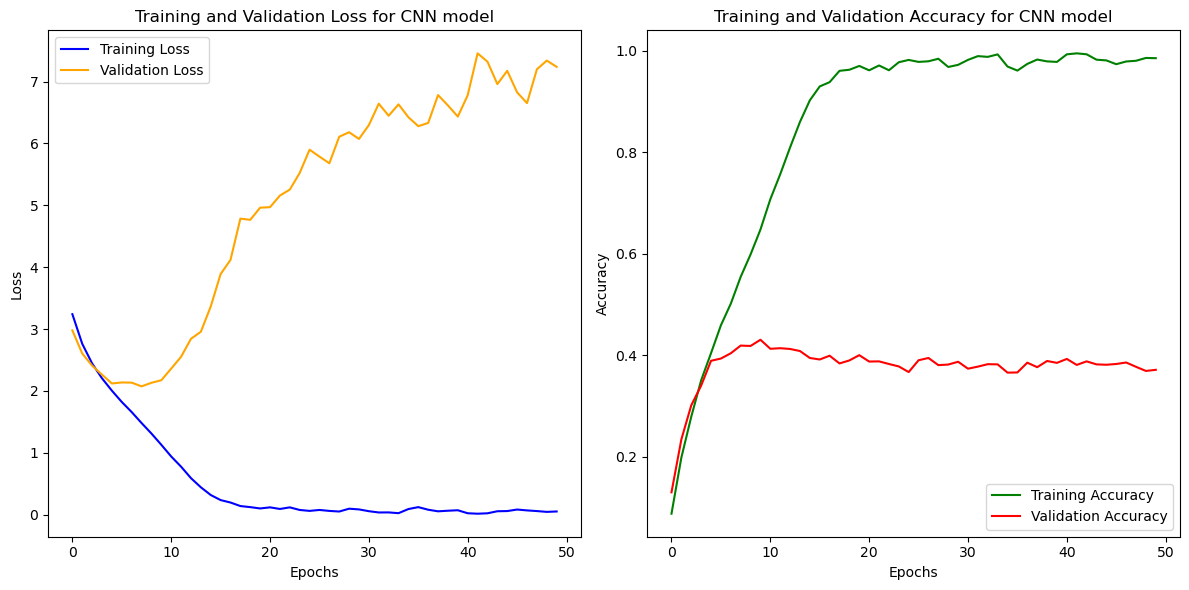

In [20]:
# Your graph
path = ROOT+'results/' + '/cnnclassifier50epochs4.pt'
checkpoint = torch.load(path)
statistics = checkpoint['stats']

training_loss = statistics[0]
training_accuracy = statistics[1]
validation_loss = statistics[2]
validation_accuracy = statistics[3]

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


fig, stats = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss
stats[0].plot(training_loss, label='Training Loss', color='blue')
stats[0].plot(validation_loss, label='Validation Loss', color='orange')
stats[0].set_title('Training and Validation Loss for CNN model')
stats[0].set_xlabel('Epochs')
stats[0].set_ylabel('Loss')
stats[0].legend()


# Plot training and validation accuracy
stats[1].plot(training_accuracy, label='Training Accuracy', color='green')
stats[1].plot(validation_accuracy, label='Validation Accuracy', color='red')
stats[1].set_title('Training and Validation Accuracy for CNN model')
stats[1].set_xlabel('Epochs')
stats[1].set_ylabel('Accuracy')
stats[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

<class '__main__.CustomCNN'>
get predictions for the training set successfully!
get predictions and probabilities for the validation set successfully!
Training Set Confusion Matrix:
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.99723757 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00276243 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.997151   0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.002849   0.         0.         0.
  0.         0.     

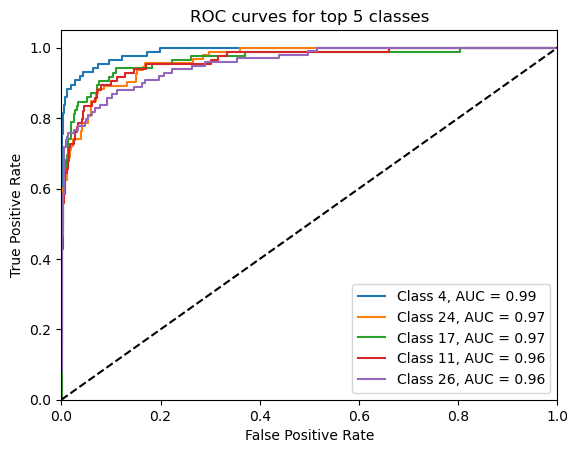

In [135]:
# Your code here!
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import torch
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load the trained model
model = CustomCNN()
checkpoint = torch.load('C:\\Users\\aman1\\OneDrive\\Desktop\\Stuff\\Masters\\Semester 2\\Deep Learning\\Assignment\\Data\\comp5625M_data_assessment_1\\train_set\\results\\cnnclassifier72epochs_augmented.pt')
model.load_state_dict(checkpoint['state_dict'])
print(type(model))
model.eval()

# Create lists to store predictions and labels
train_predictions = []
train_true_labels = []

# Create empty lists for true labels and predicted probabilities:
val_true_labels_roc = []
val_predicted_probs = []

# Evaluate the model on the training set
for train_inputs, train_labels in train_loader_new:
    with torch.no_grad():
        # Forward pass
        train_outputs = model(train_inputs)
        _, train_preds = torch.max(train_outputs, 1)
        # Append predictions and labels to lists
        train_predictions.extend(train_preds.tolist())
        train_true_labels.extend(train_labels.tolist())

print('get predictions for the training set successfully!')

val_predictions = []
val_true_labels = []

# Evaluate the model on the validation set
for val_inputs, val_labels in val_loader_new:
    #val_inputs = val_inputs.to(device)
    #val_labels = val_labels.to(device)
    with torch.no_grad():
        # Forward pass
        val_outputs = model(val_inputs)
        _, val_preds = torch.max(val_outputs, 1)
        # Append predictions and labels to lists
        val_predictions.extend(val_preds.tolist())
        val_true_labels.extend(val_labels.tolist())
        # Append to ROC lists
        val_probs = torch.nn.functional.softmax(val_outputs, dim=1)
        val_true_labels_roc.append(val_labels.cpu().numpy())
        val_predicted_probs.append(val_probs.cpu().numpy())

print('get predictions and probabilities for the validation set successfully!')

# Compute the confusion matrices
train_confusion_matrix = confusion_matrix(train_true_labels, train_predictions)
val_confusion_matrix = confusion_matrix(val_true_labels, val_predictions)

# Normalize the confusion matrices
train_confusion_matrix_norm = train_confusion_matrix.astype('float') / train_confusion_matrix.sum(axis=1)[:, np.newaxis]
val_confusion_matrix_norm = val_confusion_matrix.astype('float') / val_confusion_matrix.sum(axis=1)[:, np.newaxis]

# Print the confusion matrices
print("Training Set Confusion Matrix:")
print(train_confusion_matrix_norm)
print("Validation Set Confusion Matrix:")
print(val_confusion_matrix_norm)

# ROC
# Concatenate the true labels and predicted probabilities into numpy arrays
print(len(val_predicted_probs))
val_true_labels_roc = np.concatenate(val_true_labels_roc)
val_predicted_probs = np.concatenate(val_predicted_probs)

# Compute the ROC curves and AUCs for each class using scikit-learn:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(30):
    fpr[i], tpr[i], _ = roc_curve(np.array(val_true_labels) == i, val_predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Sort top 5 classes
top_classes = sorted(range(30), key=lambda i: roc_auc[i], reverse=True)[:5]

# Plot ROC curves
plt.figure()
for i in top_classes:
    plt.plot(fpr[i], tpr[i], label='Class {}, AUC = {:.2f}'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for top 5 classes')
plt.legend(loc="lower right")
plt.show()

### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish.

In [ ]:
# Your code here (optional)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``.
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations.

> Provide graphs and comment on what you observe.


In [35]:
# Your code here!
# Set random seed for reproducibility
from torch.utils.data import DataLoader, ConcatDataset
from torch.utils.data import Subset


torch.manual_seed(201711295)


transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation(degrees=30),  # Random rotation by up to 30 degrees
    transforms.RandomResizedCrop(size=64),  # Randomly crop and resize to 64x64
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.GaussianBlur(kernel_size=3),  # Add Gaussian blur with kernel size 3
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Random brightness and contrast adjustment
])

#train_loader_new dataset which is non augmented
dataset_non_augmented = train_loader_new.dataset
#augmented dataset with train and validation data
dataset_augmented_all = datasets.ImageFolder(root=DataPath, transform= transform2)
dataset_augmented = Subset(dataset_augmented_all, train_indices)
#concat both dataset
combined_dataset = ConcatDataset([dataset_augmented, dataset_non_augmented])
#create a combined loader
train_loader_combined = DataLoader(combined_dataset, batch_size=64, shuffle=True)
#create another loader with augmented data
train_loader_augmented = DataLoader(dataset_augmented, batch_size=64, shuffle=True)



In [62]:
#TO COMPLETE --> Running your CNN model class with augmented data
torch.manual_seed(0)

net3 = CustomCNN()
checkpoint = torch.load(saveCkpt)
net3.load_state_dict(checkpoint['state_dict'])
statsrec = checkpoint['stats']
nepochs = 72

# create directory to save your checkpoints
results_path = ROOT+'results/'
os.makedirs(results_path, exist_ok = True)
saveCkpt2 = results_path+ 'cnnclassifier100epochs_augmentedonly.pt'

statsrec = np.zeros((4,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net3.parameters(), lr=0.001)

#to work with gpu you will need to load data and labels to gpu
#net3 = net3.to(device)

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader_augmented:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        #inputs = inputs.to(device)
        #labels = labels.to(device)

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net3(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    ltst, atst = stats(val_loader_new, net3)

    ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    print(f"epoch: {epoch + 1} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  Validation loss: {ltst: .3f} Validation accuracy: {atst: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": net3.state_dict(), "stats": statsrec}, saveCkpt2)

epoch: 1 training loss:  2.532 training accuracy:  28.4%  Validation loss:  2.436 Validation accuracy:  32.8%
epoch: 2 training loss:  2.398 training accuracy:  31.1%  Validation loss:  2.408 Validation accuracy:  35.9%
epoch: 3 training loss:  2.331 training accuracy:  32.8%  Validation loss:  2.336 Validation accuracy:  34.6%
epoch: 4 training loss:  2.293 training accuracy:  33.9%  Validation loss:  2.402 Validation accuracy:  34.2%
epoch: 5 training loss:  2.251 training accuracy:  34.7%  Validation loss:  2.179 Validation accuracy:  39.1%
epoch: 6 training loss:  2.207 training accuracy:  35.5%  Validation loss:  2.254 Validation accuracy:  37.5%
epoch: 7 training loss:  2.202 training accuracy:  36.4%  Validation loss:  2.143 Validation accuracy:  39.3%
epoch: 8 training loss:  2.186 training accuracy:  37.3%  Validation loss:  2.205 Validation accuracy:  38.6%
epoch: 9 training loss:  2.170 training accuracy:  36.9%  Validation loss:  2.064 Validation accuracy:  40.4%
epoch: 10 

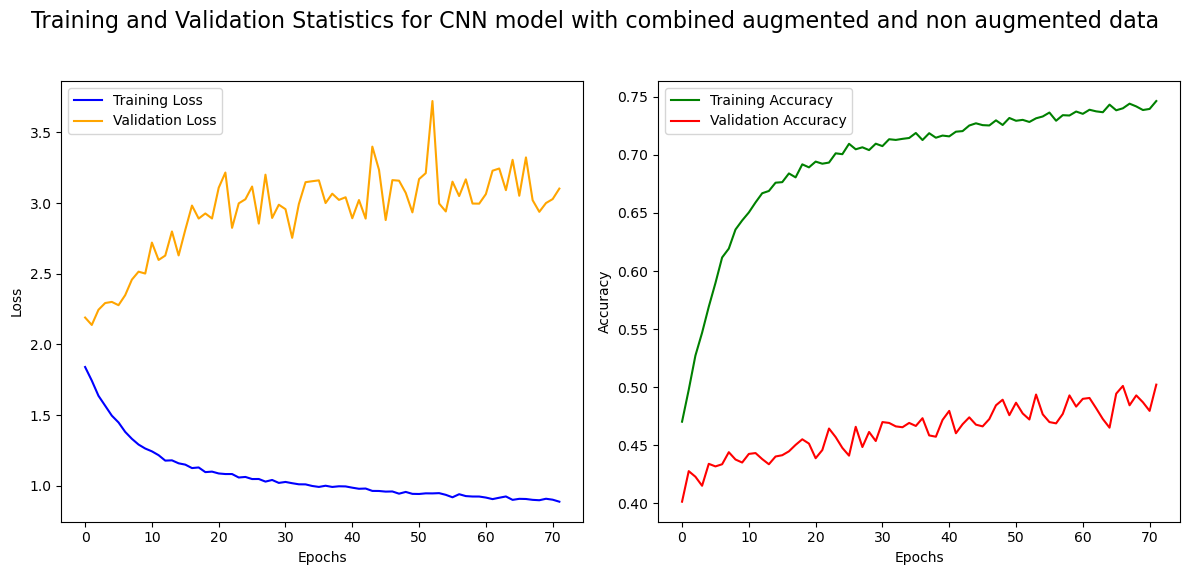

In [26]:
# Your graph
path = ROOT+'results/' + '/cnnclassifier72epochs_augmented.pt'
checkpoint = torch.load(path)
statistics = checkpoint['stats']

training_loss = statistics[0]
training_accuracy = statistics[1]
validation_loss = statistics[2]
validation_accuracy = statistics[3]

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


fig, stats = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss
stats[0].plot(training_loss, label='Training Loss', color='blue')
stats[0].plot(validation_loss, label='Validation Loss', color='orange')
#stats[0].set_title('Training and Validation Loss for CNN model with augmented data')
stats[0].set_xlabel('Epochs')
stats[0].set_ylabel('Loss')
stats[0].legend()


# Plot training and validation accuracy
stats[1].plot(training_accuracy, label='Training Accuracy', color='green')
stats[1].plot(validation_accuracy, label='Validation Accuracy', color='red')
#stats[1].set_title('Training and Validation Accuracy for CNN model with augmented data')
stats[1].set_xlabel('Epochs')
stats[1].set_ylabel('Accuracy')
stats[1].legend()

# Show the plots
#plt.tight_layout()
plt.suptitle('Training and Validation Statistics for CNN model with combined augmented and non augmented data', fontsize=16)  
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

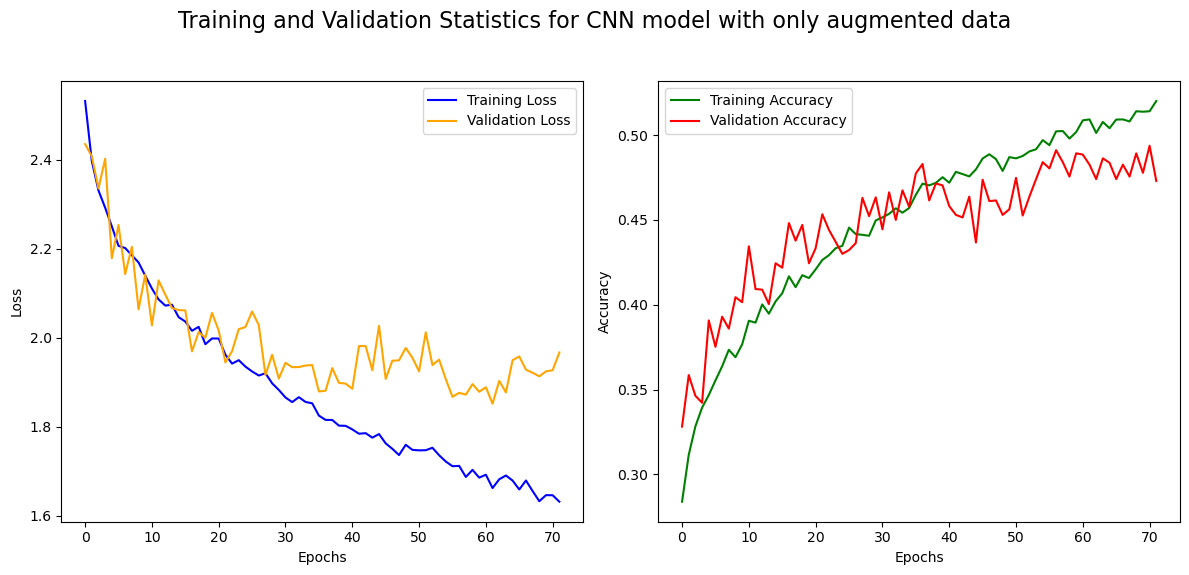

In [28]:
# Your graph
path = ROOT+'results/' + '/cnnclassifier100epochs_augmentedonly.pt'
checkpoint = torch.load(path)
statistics = checkpoint['stats']

training_loss = statistics[0]
training_accuracy = statistics[1]
validation_loss = statistics[2]
validation_accuracy = statistics[3]

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


fig, stats = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss
stats[0].plot(training_loss, label='Training Loss', color='blue')
stats[0].plot(validation_loss, label='Validation Loss', color='orange')
#stats[0].set_title('Training and Validation Loss for CNN model with augmented data')
stats[0].set_xlabel('Epochs')
stats[0].set_ylabel('Loss')
stats[0].legend()


# Plot training and validation accuracy
stats[1].plot(training_accuracy, label='Training Accuracy', color='green')
stats[1].plot(validation_accuracy, label='Validation Accuracy', color='red')
#stats[1].set_title('Training and Validation Accuracy for CNN model with augmented data')
stats[1].set_xlabel('Epochs')
stats[1].set_ylabel('Accuracy')
stats[1].legend()

# Show the plots
#plt.tight_layout()
plt.suptitle('Training and Validation Statistics for CNN model with only augmented data', fontsize=16)  
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

### Data Augmentation Comments:
The CNN model was trained using the pretrained weights from the previous run and two different datasets, the first dataset included both the new Augmented and the old Non Augmented data, whereas the 2nd dataset only included the new augmented data, in both cases the accuracy has gone upto 50% but the loss is lesser when we resume training using only the new augmented data, the loss in this case goes below 2 whereas the loss in the first case oscillates around 3.

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model

> Provide graphs and comment on your choice of proportion used.

In [31]:
CustomCNN_dropout = CustomCNN()
CustomCNN_dropout.fc2 = nn.Sequential(
    CustomCNN_dropout.fc2,
    nn.Dropout(p=0.6)
)
print(CustomCNN_dropout)

CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=8192, out_features=256, bias=True)
  (relu4): ReLU()
  (fc2): Sequential(
    (0): Linear(in_features=256, out_features=64, bias=True)
    (1): Dropout(p=0.6, inplace=False)
  )
  (relu5): ReLU()
  (fc3): Linear(in_features=64, out_features=30, bias=True)
)


In [57]:
#TO COMPLETE --> Running your CNN model class with dropout
torch.manual_seed(0)

net4 = CustomCNN_dropout
checkpoint = torch.load(saveCkpt)

checkpoint['state_dict']['fc2.0.weight'] = checkpoint['state_dict']['fc2.weight']
checkpoint['state_dict']['fc2.0.bias'] = checkpoint['state_dict']['fc2.bias']
del checkpoint['state_dict']['fc2.weight']
del checkpoint['state_dict']['fc2.bias']

net4.load_state_dict(checkpoint['state_dict'])

#statsrec = checkpoint['stats']
nepochs = 50
net4 = net4.to('cuda')
net4 = net4.cuda()

# create directory to save your checkpoints
results_path = ROOT+'results/'
os.makedirs(results_path, exist_ok = True)
saveCkpt3 = results_path+ 'cnnclassifier50epochs_dropoutnotaugmented3.pt'

statsrec = np.zeros((4,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net4.parameters(), lr=0.001)

#to work with gpu you will need to load data and labels to gpu
net4 = net4.to('cuda')

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader_new:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        inputs, labels = inputs.cuda(), labels.cuda()

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net4(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    ltst, atst = stats2(val_loader_new, net4)

    ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    print(f"epoch: {epoch + 1} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  Validation loss: {ltst: .3f} Validation accuracy: {atst: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": net4.state_dict(), "stats": statsrec}, saveCkpt3)

epoch: 1 training loss:  1.517 training accuracy:  52.7%  Validation loss:  2.451 Validation accuracy:  35.3%
epoch: 2 training loss:  1.298 training accuracy:  59.6%  Validation loss:  2.489 Validation accuracy:  35.6%
epoch: 3 training loss:  1.180 training accuracy:  62.9%  Validation loss:  2.550 Validation accuracy:  37.0%
epoch: 4 training loss:  1.047 training accuracy:  67.2%  Validation loss:  2.601 Validation accuracy:  36.7%
epoch: 5 training loss:  0.946 training accuracy:  69.8%  Validation loss:  2.785 Validation accuracy:  36.7%
epoch: 6 training loss:  0.822 training accuracy:  73.9%  Validation loss:  2.741 Validation accuracy:  37.6%
epoch: 7 training loss:  0.734 training accuracy:  76.4%  Validation loss:  3.185 Validation accuracy:  36.8%
epoch: 8 training loss:  0.665 training accuracy:  78.5%  Validation loss:  3.154 Validation accuracy:  38.0%
epoch: 9 training loss:  0.579 training accuracy:  81.1%  Validation loss:  3.304 Validation accuracy:  37.1%
epoch: 10 

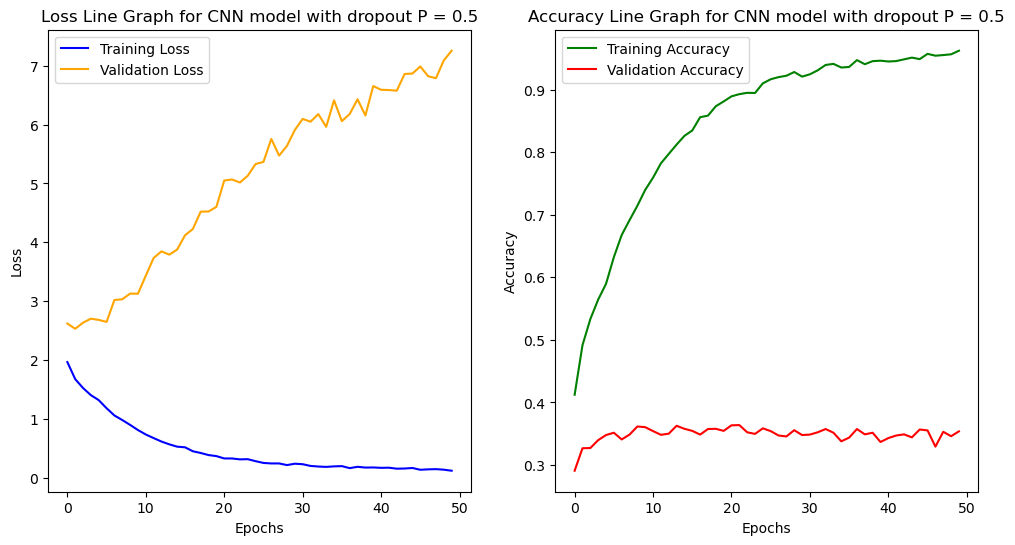

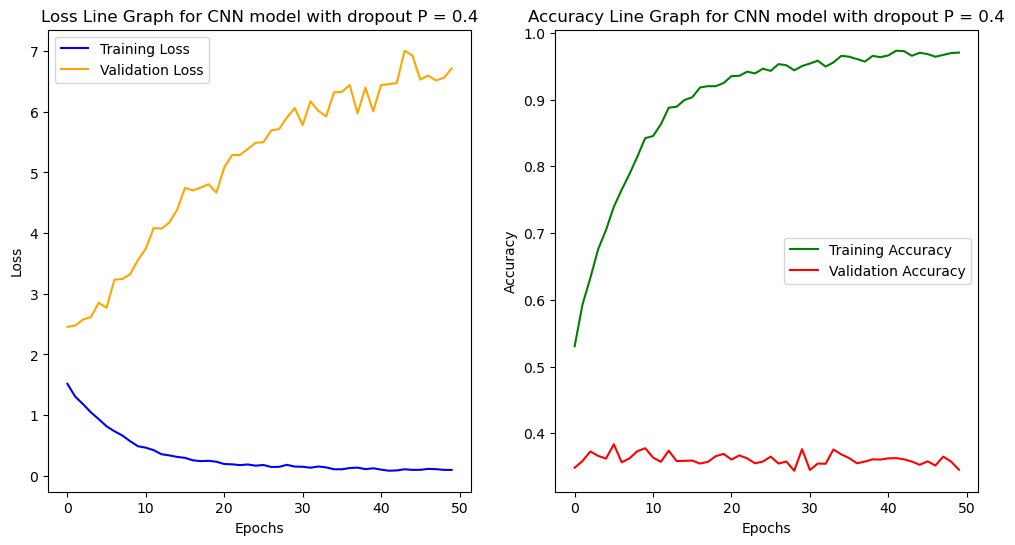

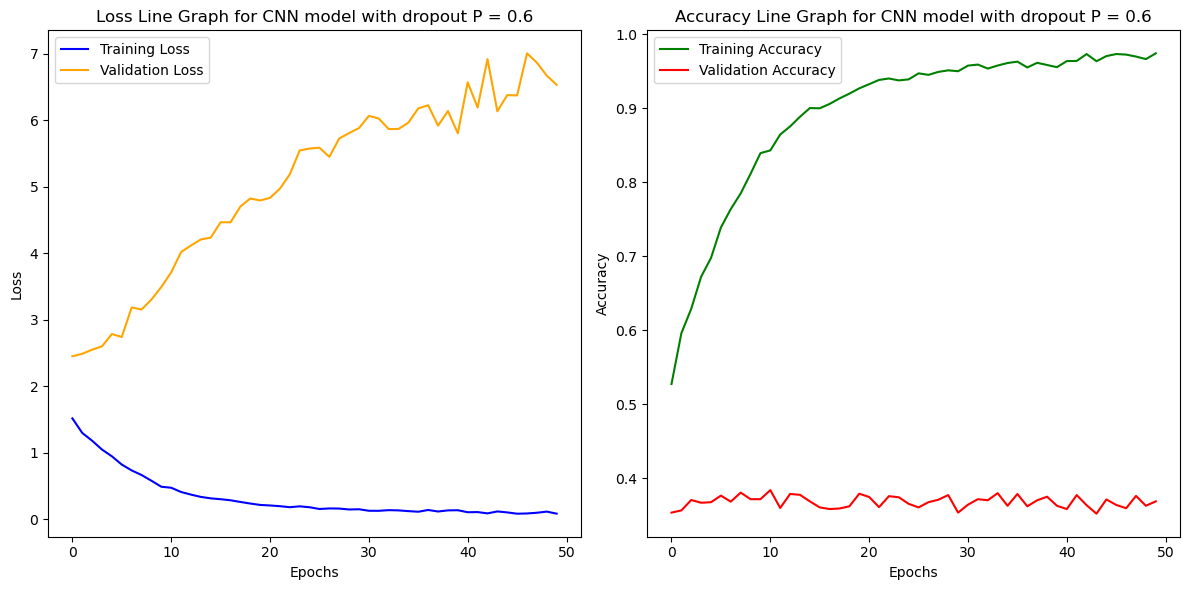

In [42]:
path1 = ROOT+'results/' + '/cnnclassifier50epochs_dropoutnotaugmented1.pt'
path2 = ROOT+'results/' + '/cnnclassifier50epochs_dropoutnotaugmented2.pt'
path3 = ROOT+'results/' + '/cnnclassifier50epochs_dropoutnotaugmented3.pt'


checkpoint1 = torch.load(path1)
statistics1 = checkpoint1['stats']
checkpoint2 = torch.load(path2)
statistics2 = checkpoint2['stats']
checkpoint3 = torch.load(path3)
statistics3 = checkpoint3['stats']

training_loss1 = statistics1[0]
training_accuracy1 = statistics1[1]
validation_loss1 = statistics1[2]
validation_accuracy1 = statistics1[3]

training_loss2 = statistics2[0]
training_accuracy2 = statistics2[1]
validation_loss2 = statistics2[2]
validation_accuracy2 = statistics2[3]

training_loss3 = statistics3[0]
training_accuracy3 = statistics3[1]
validation_loss3 = statistics3[2]
validation_accuracy3 = statistics3[3]

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

####################################################################################################
fig1, stats1 = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss for learning rate 0.01 
stats1[0].plot(training_loss1, label='Training Loss', color='blue')
stats1[0].plot(validation_loss1, label='Validation Loss', color='orange')
stats1[0].set_title('Loss Line Graph for CNN model with dropout P = 0.5')
stats1[0].set_xlabel('Epochs') 
stats1[0].set_ylabel('Loss')
stats1[0].legend()


# Plot training and validation accuracy for learning rate 0.01
stats1[1].plot(training_accuracy1, label='Training Accuracy', color='green')
stats1[1].plot(validation_accuracy1, label='Validation Accuracy', color='red')
stats1[1].set_title('Accuracy Line Graph for CNN model with dropout P = 0.5')
stats1[1].set_xlabel('Epochs')
stats1[1].set_ylabel('Accuracy')
stats1[1].legend()

####################################################################################################
fig2, stats2 = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss for learning rate 0.01 
stats2[0].plot(training_loss2, label='Training Loss', color='blue')
stats2[0].plot(validation_loss2, label='Validation Loss', color='orange')
stats2[0].set_title('Loss Line Graph for CNN model with dropout P = 0.4')
stats2[0].set_xlabel('Epochs')
stats2[0].set_ylabel('Loss')
stats2[0].legend()


# Plot training and validation accuracy for learning rate 0.01
stats2[1].plot(training_accuracy2, label='Training Accuracy', color='green')
stats2[1].plot(validation_accuracy2, label='Validation Accuracy', color='red')
stats2[1].set_title('Accuracy Line Graph for CNN model with dropout P = 0.4')
stats2[1].set_xlabel('Epochs')
stats2[1].set_ylabel('Accuracy')
stats2[1].legend()
####################################################################################################

fig3, stats3 = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss for learning rate 0.01 
stats3[0].plot(training_loss3, label='Training Loss', color='blue')
stats3[0].plot(validation_loss3, label='Validation Loss', color='orange')
stats3[0].set_title('Loss Line Graph for CNN model with dropout P = 0.6')
stats3[0].set_xlabel('Epochs')
stats3[0].set_ylabel('Loss')
stats3[0].legend()


# Plot training and validation accuracy for learning rate 0.01
stats3[1].plot(training_accuracy3, label='Training Accuracy', color='green')
stats3[1].plot(validation_accuracy3, label='Validation Accuracy', color='red')
stats3[1].set_title('Accuracy Line Graph for CNN model with dropout P = 0.6')
stats3[1].set_xlabel('Epochs')
stats3[1].set_ylabel('Accuracy')
stats3[1].legend()
####################################################################################################

# Show the plots
plt.tight_layout()
#plt.suptitle('Training and Validation Statistics for CNN model with only augmented data', fontsize=16)  
#plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

### Effects of applying Dropout:
A Dropout function was added to the 2nd fully connect layer, the layer before the output layer, the rate of P (P gives the probability of a neuron in the hidden layer to be excluded) was set to 3 different numbers in 3 runs, (0.4,0.5 and 0.6) in all cases we used the non augmented data and the pretrained weights and in all cases the validation accuracy seems to reduce slightly while the validation loss increases significantly, meanwhile the training loss reduces drastically and the training accuracy increases.
The above suggests that the model is overfitting as prior to this the model was already trained to minimize overfitting by early stopping.

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [39]:
# Your code here!
torch.manual_seed(0)

net5 = CustomCNN()
checkpoint = torch.load(saveCkpt)
net5.load_state_dict(checkpoint['state_dict'])
#statsrec = checkpoint['stats']
nepochs = 75
net5 = net5.to('cuda')
net5 = net5.cuda()
# create directory to save your checkpoints
results_path = ROOT+'results/'
os.makedirs(results_path, exist_ok = True)
saveCkpt4 = results_path+ 'cnnclassifier75epochs_augmentedlearningrate2.pt'

statsrec = np.zeros((4,nepochs))

loss_fn = nn.CrossEntropyLoss()
#optimizer = optim.Adam(net5.parameters(), lr=0.01)
optimizer = optim.Adam(net5.parameters(), lr=0.001)
#optimizer = optim.Adam(net5.parameters(), lr=0.0001)


for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader_combined:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        inputs, labels = inputs.cuda(), labels.cuda()
         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net5(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    ltst, atst = stats2(val_loader_new, net5)

    ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    print(f"epoch: {epoch + 1} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  Validation loss: {ltst: .3f} Validation accuracy: {atst: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": net5.state_dict(), "stats": statsrec}, saveCkpt4)

epoch: 1 training loss:  1.841 training accuracy:  46.9%  Validation loss:  2.157 Validation accuracy:  41.0%
epoch: 2 training loss:  1.744 training accuracy:  49.8%  Validation loss:  2.160 Validation accuracy:  41.1%
epoch: 3 training loss:  1.641 training accuracy:  52.5%  Validation loss:  2.236 Validation accuracy:  42.0%
epoch: 4 training loss:  1.572 training accuracy:  54.4%  Validation loss:  2.289 Validation accuracy:  41.4%
epoch: 5 training loss:  1.500 training accuracy:  56.7%  Validation loss:  2.308 Validation accuracy:  44.3%
epoch: 6 training loss:  1.447 training accuracy:  58.9%  Validation loss:  2.259 Validation accuracy:  43.8%
epoch: 7 training loss:  1.378 training accuracy:  60.8%  Validation loss:  2.376 Validation accuracy:  42.9%
epoch: 8 training loss:  1.332 training accuracy:  62.0%  Validation loss:  2.448 Validation accuracy:  44.6%
epoch: 9 training loss:  1.298 training accuracy:  63.3%  Validation loss:  2.469 Validation accuracy:  43.3%
epoch: 10 

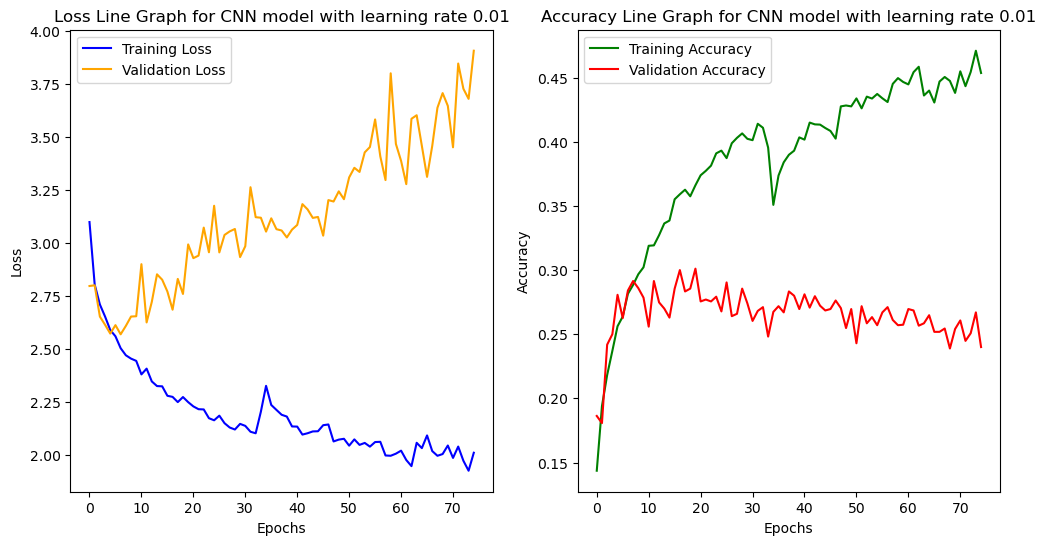

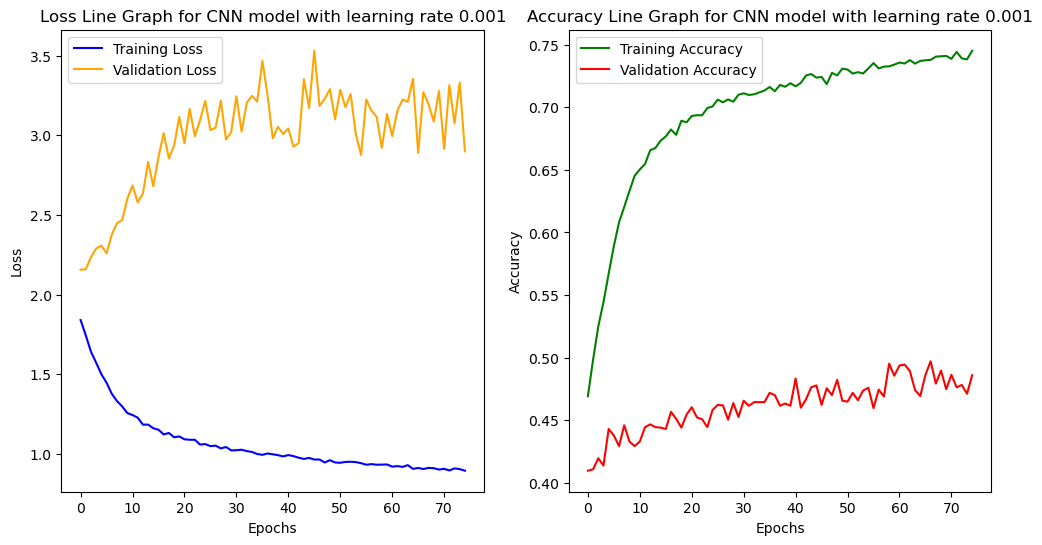

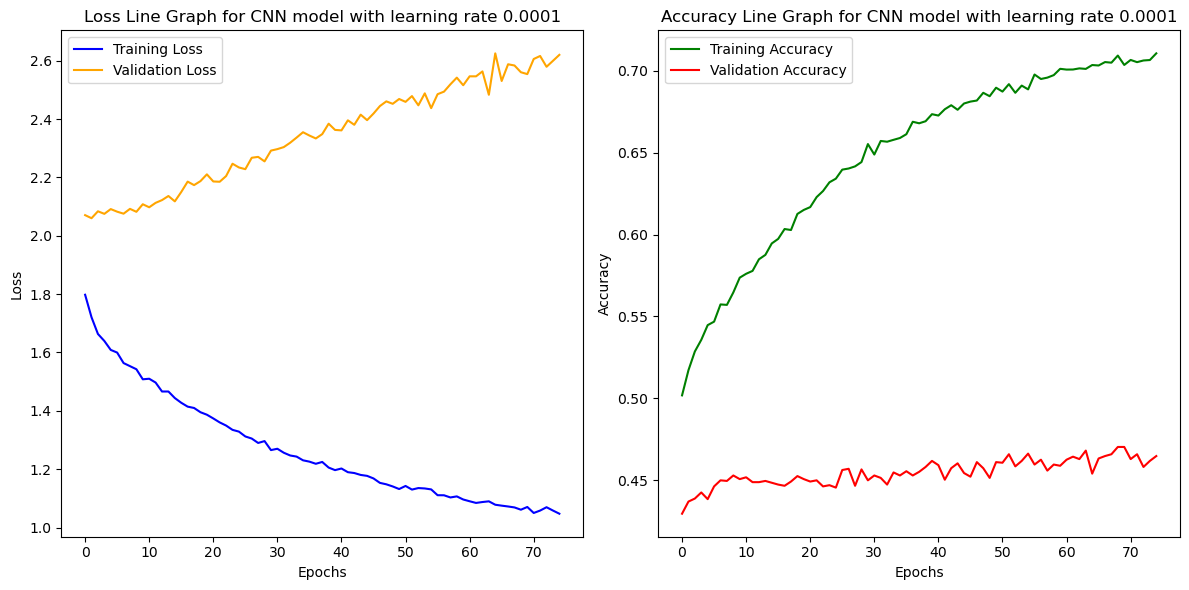

In [41]:
path1 = ROOT+'results/' + '/cnnclassifier75epochs_augmentedlearningrate1.pt'
path2 = ROOT+'results/' + '/cnnclassifier75epochs_augmentedlearningrate2.pt'
path3 = ROOT+'results/' + '/cnnclassifier75epochs_augmentedlearningrate3.pt'


checkpoint1 = torch.load(path1)
statistics1 = checkpoint1['stats']
checkpoint2 = torch.load(path2)
statistics2 = checkpoint2['stats']
checkpoint3 = torch.load(path3)
statistics3 = checkpoint3['stats']

training_loss1 = statistics1[0]
training_accuracy1 = statistics1[1]
validation_loss1 = statistics1[2]
validation_accuracy1 = statistics1[3]

training_loss2 = statistics2[0]
training_accuracy2 = statistics2[1]
validation_loss2 = statistics2[2]
validation_accuracy2 = statistics2[3]

training_loss3 = statistics3[0]
training_accuracy3 = statistics3[1]
validation_loss3 = statistics3[2]
validation_accuracy3 = statistics3[3]

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

####################################################################################################
fig1, stats1 = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss for learning rate 0.01 
stats1[0].plot(training_loss1, label='Training Loss', color='blue')
stats1[0].plot(validation_loss1, label='Validation Loss', color='orange')
stats1[0].set_title('Loss Line Graph for CNN model with learning rate 0.01')
stats1[0].set_xlabel('Epochs')
stats1[0].set_ylabel('Loss')
stats1[0].legend()


# Plot training and validation accuracy for learning rate 0.01
stats1[1].plot(training_accuracy1, label='Training Accuracy', color='green')
stats1[1].plot(validation_accuracy1, label='Validation Accuracy', color='red')
stats1[1].set_title('Accuracy Line Graph for CNN model with learning rate 0.01')
stats1[1].set_xlabel('Epochs')
stats1[1].set_ylabel('Accuracy')
stats1[1].legend()

####################################################################################################
fig2, stats2 = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss for learning rate 0.01 
stats2[0].plot(training_loss2, label='Training Loss', color='blue')
stats2[0].plot(validation_loss2, label='Validation Loss', color='orange')
stats2[0].set_title('Loss Line Graph for CNN model with learning rate 0.001')
stats2[0].set_xlabel('Epochs')
stats2[0].set_ylabel('Loss')
stats2[0].legend()


# Plot training and validation accuracy for learning rate 0.01
stats2[1].plot(training_accuracy2, label='Training Accuracy', color='green')
stats2[1].plot(validation_accuracy2, label='Validation Accuracy', color='red')
stats2[1].set_title('Accuracy Line Graph for CNN model with learning rate 0.001')
stats2[1].set_xlabel('Epochs')
stats2[1].set_ylabel('Accuracy')
stats2[1].legend()
####################################################################################################

fig3, stats3 = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss for learning rate 0.01 
stats3[0].plot(training_loss3, label='Training Loss', color='blue')
stats3[0].plot(validation_loss3, label='Validation Loss', color='orange')
stats3[0].set_title('Loss Line Graph for CNN model with learning rate 0.0001')
stats3[0].set_xlabel('Epochs')
stats3[0].set_ylabel('Loss')
stats3[0].legend()


# Plot training and validation accuracy for learning rate 0.01
stats3[1].plot(training_accuracy3, label='Training Accuracy', color='green')
stats3[1].plot(validation_accuracy3, label='Validation Accuracy', color='red')
stats3[1].set_title('Accuracy Line Graph for CNN model with learning rate 0.0001')
stats3[1].set_xlabel('Epochs')
stats3[1].set_ylabel('Accuracy')
stats3[1].legend()
####################################################################################################

# Show the plots
plt.tight_layout()
#plt.suptitle('Training and Validation Statistics for CNN model with only augmented data', fontsize=16)  
#plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

### Effects of changing the learning rates:
To observe this the pre defined CNN model was used without dropout along with the pretrained weights and the combination of the old non augumented and the new augumented data. The following was observed

#### Learning rate = 0.01
The Validation and training loss was the highest in this case (between 2.5 - 4), there was also a major reduction in validation accuracy going below 30% which is the worst out of all the models.

#### Learning rate = 0.001
There was a moderate increase in validation loss (between 2.0 - 3.5) with the increase in epochs but the validation accuracy had a slight improvement, reaching 50%

#### Learning rate = 0.0001
The validation loss had a slight increase (between 2.0 - 2.7) as the learning rate was very small, the accuracy had a slight increase, oscilating around the 45% range with the increase in epochs 

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set.

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [147]:
# Your code here!
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class TestDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.filenames = os.listdir(directory)

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_name = self.filenames[idx]
        img_path = os.path.join(self.directory, img_name)
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)

        return image, img_name

    
transform = transforms.Compose([
    transforms.ToTensor(),
])
path_test_file = 'C:\\Users\\aman1\\OneDrive\\Desktop\\Stuff\\Masters\\Semester 2\\Deep Learning\\Assignment\\Data\\comp5625M_data_assessment_1\\test_set\\test_set\\'   
test_dataset = TestDataset(path_test_file,transforms.ToTensor())

test_data_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks].


In [154]:
# Your code here!
torch.manual_seed(0)
import csv
file_name = 'mm23ab.csv'

final_model = CustomCNN()
checkpoint = torch.load('C:\\Users\\aman1\\OneDrive\\Desktop\\Stuff\\Masters\\Semester 2\\Deep Learning\\Assignment\\Data\\comp5625M_data_assessment_1\\train_set\\results\\cnnclassifier72epochs_augmented.pt')
final_model.load_state_dict(checkpoint['state_dict'])

final_model.eval()
predictions = []

with torch.no_grad():
    for image, filename in test_data_loader:
        output = final_model(image)
        _, predicted = torch.max(output,1)
        class_predicted = predicted.item()
        
        predictions.append((filename[0], class_predicted))
        #print(predictions)
    with open(file_name, mode = 'w', newline = '') as file:
        writer = csv.writer(file)
        writer.writerow(['Id','Category'])
        writer.writerows(predictions)
    


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation)

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [67]:
# Your code here!
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images to [-1, 1]
])


trainset = torchvision.datasets.CIFAR10(root='C:\\Users\\aman1\\OneDrive\\Desktop\\Stuff\\Masters\\Semester 2\\Deep Learning\\Assignment\\Data\\comp5625M_data_assessment_CIFAR10\\train_set\\', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='C:\\Users\\aman1\\OneDrive\\Desktop\\Stuff\\Masters\\Semester 2\\Deep Learning\\Assignment\\Data\\comp5625M_data_assessment_CIFAR10\\test_set\\', train=False,
                                       download=True, transform=transform)


# Create DataLoader for training and validation sets
train_loader_CIFAR10 = DataLoader(trainset, batch_size=32, shuffle=True)
val_loader_CIFAR10 = DataLoader(testset, batch_size=32, shuffle=False)

100%|██████████| 170498071/170498071 [00:09<00:00, 18049996.19it/s]


Extracting C:\Users\aman1\OneDrive\Desktop\Stuff\Masters\Semester 2\Deep Learning\Assignment\Data\comp5625M_data_assessment_CIFAR10\train_set\cifar-10-python.tar.gz to C:\Users\aman1\OneDrive\Desktop\Stuff\Masters\Semester 2\Deep Learning\Assignment\Data\comp5625M_data_assessment_CIFAR10\train_set\


100%|██████████| 170498071/170498071 [00:09<00:00, 18616202.62it/s]


Extracting C:\Users\aman1\OneDrive\Desktop\Stuff\Masters\Semester 2\Deep Learning\Assignment\Data\comp5625M_data_assessment_CIFAR10\test_set\cifar-10-python.tar.gz to C:\Users\aman1\OneDrive\Desktop\Stuff\Masters\Semester 2\Deep Learning\Assignment\Data\comp5625M_data_assessment_CIFAR10\test_set\


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [78]:
alexnet = models.alexnet(pretrained=True)

alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, 10)
alexnet = alexnet.to('cuda')
alexnet = alexnet.cuda()

#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [85]:
# Your model changes here - also print trainable parameters
torch.manual_seed(0)

alexnet = models.alexnet(pretrained=True)

alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, 10)
alexnet = alexnet.to('cuda')
alexnet = alexnet.cuda()

# create directory to save your checkpoints
results_path = ROOT+'results/'
os.makedirs(results_path, exist_ok = True)
saveCkptNotFrozen = results_path+ 'CIFARNotFrozen10epochs.pt'

statsrec = np.zeros((4,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

nepochs = 10

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader_CIFAR10:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        inputs, labels = inputs.cuda(), labels.cuda()

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = alexnet(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    ltst, atst = stats2(val_loader_CIFAR10, alexnet)
    


    ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    print(f"epoch: {epoch + 1} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  Validation loss: {ltst: .3f} Validation accuracy: {atst: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": alexnet.state_dict(), "stats": statsrec}, saveCkptNotFrozen)

epoch: 1 training loss:  0.671 training accuracy:  76.6%  Validation loss:  0.529 Validation accuracy:  81.2%
epoch: 2 training loss:  0.418 training accuracy:  85.4%  Validation loss:  0.423 Validation accuracy:  85.1%
epoch: 3 training loss:  0.335 training accuracy:  88.2%  Validation loss:  0.403 Validation accuracy:  85.9%
epoch: 4 training loss:  0.273 training accuracy:  90.3%  Validation loss:  0.400 Validation accuracy:  86.3%
epoch: 5 training loss:  0.229 training accuracy:  91.9%  Validation loss:  0.363 Validation accuracy:  87.8%
epoch: 6 training loss:  0.190 training accuracy:  93.2%  Validation loss:  0.359 Validation accuracy:  88.2%
epoch: 7 training loss:  0.163 training accuracy:  94.2%  Validation loss:  0.324 Validation accuracy:  89.2%
epoch: 8 training loss:  0.135 training accuracy:  95.3%  Validation loss:  0.371 Validation accuracy:  88.8%
epoch: 9 training loss:  0.120 training accuracy:  95.7%  Validation loss:  0.346 Validation accuracy:  89.3%
epoch: 10 

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [86]:
# Your changes here - also print trainable parameters
torch.manual_seed(0)

alexnet = models.alexnet(pretrained=True)

alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, 10)
alexnet = alexnet.to('cuda')
alexnet = alexnet.cuda()

# create directory to save your checkpoints
results_path = ROOT+'results/'
os.makedirs(results_path, exist_ok = True)
saveCkptFrozen = results_path+ 'CIFARFrozen10epochs.pt'

statsrec = np.zeros((4,nepochs))

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

nepochs = 10

for parameter in alexnet.features.parameters():
    parameter.requires_grad = False

for epoch in range(nepochs):  # loop over the dataset multiple times
    correct = 0          # number of examples predicted correctly (for accuracy)
    total = 0            # number of examples
    running_loss = 0.0   # accumulated loss (for mean loss)
    n = 0                # number of minibatches
    for data in train_loader_CIFAR10:
        inputs, labels = data

        #to work with gpu you will need to load data and labels to gpu
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        inputs, labels = inputs.cuda(), labels.cuda()

         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = alexnet(inputs) # note: .to(device) helps to load data to your gpu
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # accumulate loss
        running_loss += loss.item()
        n += 1

        # accumulate data for accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels

    # collect together statistics for this epoch
    ltrn = running_loss/n
    atrn = correct/total
    ltst, atst = stats2(val_loader_CIFAR10, alexnet)
    


    ltst = ltst.item() #item() moves the tensor data with 1 element to CPU

    statsrec[:,epoch] = (ltrn, atrn, ltst, atst)
    print(f"epoch: {epoch + 1} training loss: {ltrn: .3f} training accuracy: {atrn: .1%}  Validation loss: {ltst: .3f} Validation accuracy: {atst: .1%}")

# save network parameters, losses and accuracy
torch.save({"state_dict": alexnet.state_dict(), "stats": statsrec}, saveCkptFrozen)

epoch: 1 training loss:  0.863 training accuracy:  69.6%  Validation loss:  0.740 Validation accuracy:  73.8%
epoch: 2 training loss:  0.675 training accuracy:  76.3%  Validation loss:  0.683 Validation accuracy:  75.9%
epoch: 3 training loss:  0.609 training accuracy:  78.4%  Validation loss:  0.646 Validation accuracy:  77.3%
epoch: 4 training loss:  0.566 training accuracy:  80.0%  Validation loss:  0.634 Validation accuracy:  77.7%
epoch: 5 training loss:  0.531 training accuracy:  81.3%  Validation loss:  0.618 Validation accuracy:  77.9%
epoch: 6 training loss:  0.499 training accuracy:  82.5%  Validation loss:  0.595 Validation accuracy:  79.1%
epoch: 7 training loss:  0.469 training accuracy:  83.5%  Validation loss:  0.578 Validation accuracy:  79.5%
epoch: 8 training loss:  0.444 training accuracy:  84.4%  Validation loss:  0.598 Validation accuracy:  79.1%
epoch: 9 training loss:  0.421 training accuracy:  85.1%  Validation loss:  0.584 Validation accuracy:  80.3%
epoch: 10 

#### 4.3 Compare above configurations and comment on performances. (4 marks)

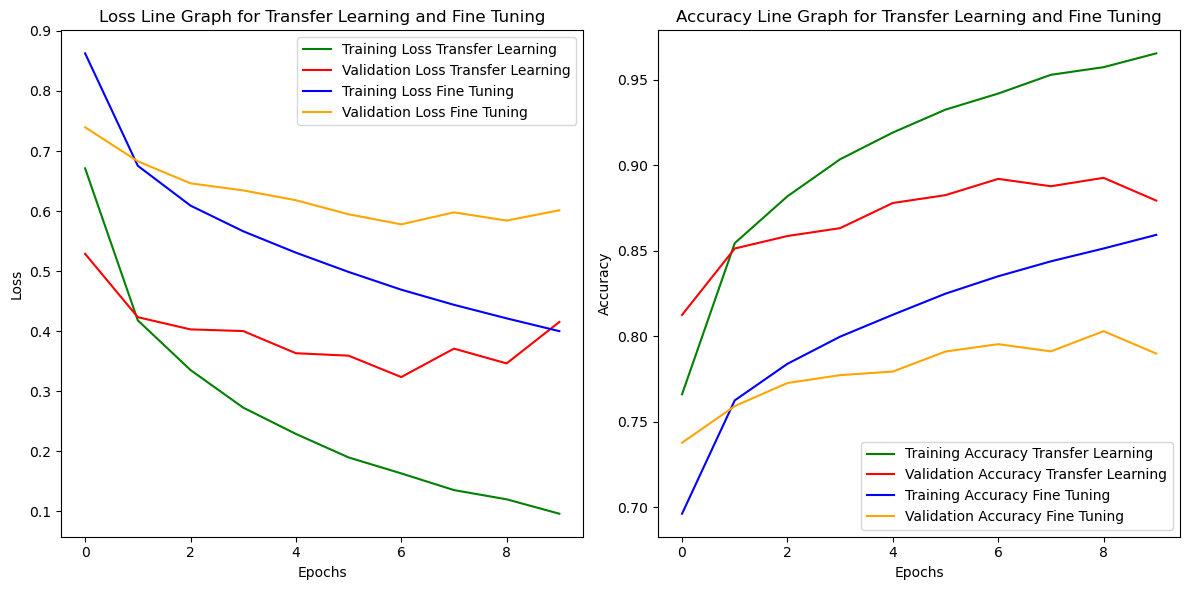

In [140]:
# Your graphs here and please provide comment in markdown in another cell
path1 = ROOT+'results/' + '/CIFARNotFrozen10epochs.pt'
path2 = ROOT+'results/' + '/CIFARFrozen10epochs.pt'



checkpoint1 = torch.load(path1)
statistics1 = checkpoint1['stats']
checkpoint2 = torch.load(path2)
statistics2 = checkpoint2['stats']


training_loss1 = statistics1[0][0:10]
training_accuracy1 = statistics1[1][0:10]
validation_loss1 = statistics1[2][0:10]
validation_accuracy1 = statistics1[3][0:10]

training_loss2 = statistics2[0][0:10]
training_accuracy2 = statistics2[1][0:10]
validation_loss2 = statistics2[2][0:10]
validation_accuracy2 = statistics2[3][0:10]


os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

####################################################################################################
fig1, stats1 = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot training and validation loss for learning rate 0.01 
stats1[0].plot(training_loss1, label='Training Loss Transfer Learning', color='green')
stats1[0].plot(validation_loss1, label='Validation Loss Transfer Learning', color='red')
stats1[0].plot(training_loss2, label='Training Loss Fine Tuning', color='blue')
stats1[0].plot(validation_loss2, label='Validation Loss Fine Tuning', color='orange')
stats1[0].set_title('Loss Line Graph for Transfer Learning and Fine Tuning')
stats1[0].set_xlabel('Epochs')
stats1[0].set_ylabel('Loss')
stats1[0].legend()


# Plot training and validation accuracy for learning rate 0.01
stats1[1].plot(training_accuracy1, label='Training Accuracy Transfer Learning', color='green')
stats1[1].plot(validation_accuracy1, label='Validation Accuracy Transfer Learning', color='red')
stats1[1].plot(training_accuracy2, label='Training Accuracy Fine Tuning', color='blue')
stats1[1].plot(validation_accuracy2, label='Validation Accuracy Fine Tuning', color='orange')
stats1[1].set_title('Accuracy Line Graph for Transfer Learning and Fine Tuning')
stats1[1].set_xlabel('Epochs')
stats1[1].set_ylabel('Accuracy')
stats1[1].legend()

####################################################################################################




# Show the plots
plt.tight_layout()
#plt.suptitle('Training and Validation Statistics for CNN model with only augmented data', fontsize=16)  
#plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

#### Observations:
Both Validation Loss and Training Loss is lower for Transfer Learning without freezing any layers (validation loss ranging between 0.3 to 0.5) compared to freezing the layers (validation loss ranging between 0.55 to 0.75), and in case of accuracy the scenario is opposite, both Validation and Training accuracy is higher in case of Transfer learning (around 90%) compared to fine tuning via freezing CNN layers (accuracy of around 80%). In this case tranfer learning without freezing any layer is a better alternative as the new task is similar to the original task.

### Part II: Image Captioning using RNN [30 marks]



### Motivation

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H).

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here!

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``).

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects.

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset.

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment).

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [131]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [132]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [ ]:
# Load the feature map provided to you
features_map = torch.load('coco_features_'+(device.type)+'.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [45]:
import json
import pandas as pd

with open('C:/Users/aman1/OneDrive/Desktop/Stuff/Masters/Semester 2/Deep Learning/Assignment/Data/COMP5625M_data_assessment_2/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [47]:
coco_subset = pd.read_csv("C:/Users/aman1/OneDrive/Desktop/Stuff/Masters/Semester 2/Deep Learning/Assignment/Data/COMP5625M_data_assessment_2/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [48]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [49]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [50]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [51]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [52]:
### build vocabulariy for each set - train, val and test
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2361


In [53]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2547

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn.


In [203]:
from helperDL import EncoderCNN
model = EncoderCNN()
print(model)

C:\Users\aman1\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\aman1\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [92]:
''' Load the saved image feature maps and trained model ("provided to you") '''

# ---> your entry here (make sure that the path is correct)
#features = torch.load("coco_features.pt")

# also load the model ckpt and udate the model state dict of the base model
# ---> your entry here (make sure that the path is correct)
#checkpoint = torch.load("ckpt file here")
#model.load_state_dict(checkpoint['model_state_dict'])


features_map = torch.load('C:/Users/aman1/OneDrive/Desktop/Stuff/Masters/Semester 2/Deep Learning/Assignment/Data/Part2_DLAssessment_FeatureResNet50/Part2_DLAssessment_FeatureResNet50/resnet50_caption.pt')


In [93]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [94]:
# say this is as below
# --> Please change these numbers as required.
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [157]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        # we want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 2048)
        # into a Linear layer to resize
        # your code
        self.resize = nn.Linear(2048, embed_size)
        # batch normalisation helps to speed up training
        # your code
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

        # your code for embedding layer
        self.embed = nn.Embedding(vocab_size, embed_size)

        # your code for RNN
        self.rnn = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length


    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)

        # compute your feature embeddings
        # your code
        #embeddings = self.embed(captions)
        
        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)

        #inputs = torch.cat((features.unsqueeze(1), embeddings), 1)

        packed = nn.utils.rnn.pack_padded_sequence(embeddings, lengths, batch_first=True, enforce_sorted=False)
        #packed = nn.utils.rnn.pack_padded_sequence(inputs, lengths, batch_first=True)

        hiddens, _ = self.rnn(packed)

        # pack_padded_sequence returns a PackedSequence object, which contains two items:
        # the packed data (data cut off at its true length and flattened into one list), and
        # the batch_sizes, or the number of elements at each sequence step in the batch.
        # For instance, given data [a, b, c] and [x] the PackedSequence would contain data
        # [a, x, b, c] with batch_sizes=[2,1,1].

        # your code [hint: use pack_padded_sequence]

        outputs, _ = nn.utils.rnn.pad_packed_sequence(hiddens, batch_first=True)

        outputs = self.linear(hiddens[0]) #hint: use a hidden layers in parenthesis
        return outputs


    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)              # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [158]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS)

In [159]:
decoder

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2547, 256)
  (rnn): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2547, bias=True)
)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [160]:

# loss and optimizer here
# your code here --->
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(decoder.parameters(),lr=0.001)


# train the models
total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)
total_loss = 0
for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    n = 0
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        # your code here --->
        optimizer.zero_grad()
        outputs=decoder(features_,captions_,lengths_)
        targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]
        loss=criterion(outputs,targets)
        loss.backward()
        optimizer.step()      
        
        total_loss += loss.item()

        # print stats
        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")

    stats[epoch,0] = round(total_loss/total_step,3)
    total_loss = 0
    decoder.eval()
    with torch.no_grad():
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            # your code here --->
            optimizer.zero_grad()
            outputs=decoder(features_,captions_,lengths_)
            targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]
            loss=criterion(outputs,targets)
            total_loss += loss.item()



    stats[epoch,1] = round(total_loss/total_step_v,3)
    total_loss = 0
    # print stats
    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
    print("="*30)
    decoder.train()

(5, 2)
Epoch [1/5], Step [0/555], Loss: 7.8477
Epoch [1/5], Step [10/555], Loss: 5.8190
Epoch [1/5], Step [20/555], Loss: 5.6419
Epoch [1/5], Step [30/555], Loss: 5.3273
Epoch [1/5], Step [40/555], Loss: 5.0116
Epoch [1/5], Step [50/555], Loss: 4.8498
Epoch [1/5], Step [60/555], Loss: 4.5491
Epoch [1/5], Step [70/555], Loss: 4.4834
Epoch [1/5], Step [80/555], Loss: 4.6835
Epoch [1/5], Step [90/555], Loss: 4.5724
Epoch [1/5], Step [100/555], Loss: 4.4280
Epoch [1/5], Step [110/555], Loss: 4.2486
Epoch [1/5], Step [120/555], Loss: 4.4483
Epoch [1/5], Step [130/555], Loss: 4.1061
Epoch [1/5], Step [140/555], Loss: 4.0740
Epoch [1/5], Step [150/555], Loss: 4.0613
Epoch [1/5], Step [160/555], Loss: 3.9551
Epoch [1/5], Step [170/555], Loss: 4.1084
Epoch [1/5], Step [180/555], Loss: 3.9883
Epoch [1/5], Step [190/555], Loss: 3.8767
Epoch [1/5], Step [200/555], Loss: 3.4982
Epoch [1/5], Step [210/555], Loss: 3.9553
Epoch [1/5], Step [220/555], Loss: 3.9941
Epoch [1/5], Step [230/555], Loss: 3.7

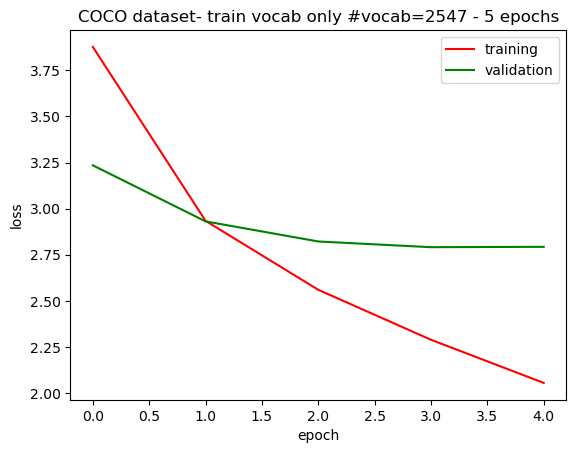

In [161]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

In [162]:
# save model after training
decoder_ckpt = torch.save(decoder, "coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks]

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [191]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class COCOImagesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        #self.vocab = vocab
        #self.features = features
        
        #self.padded = padded
        #self.max_len = max_len
        self.transform = transform
    def __getitem__(self, index):
        image_name = self.df.iloc[index]['file_name']
        caption = self.df.iloc[index]['clean_caption']
        image = Image.open(r"C:\\Users\\aman1\\OneDrive\\Desktop\\Stuff\\Masters\\Semester 2\\Deep Learning\\Assignment\\Data\\COMP5625M_data_assessment_2\\coco\\images\\"+str(img_name)).convert('RGB')
        image = self.transform(image)

        return image,caption, image_name

    def __len__(self):
        return len(self.df)

In [192]:
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [193]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2547, 256)
  (rnn): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2547, bias=True)
)

In [169]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

GENERATED: 
 two giraffes are standing in the grass
REFERENCES:
A giraffe mother with its baby in the forest.
A giraffe standing up nearby a tree 
Two giraffes standing in a tree filled area.
A giraffe standing next to a forest filled with trees.
A giraffe eating food from the top of the tree.



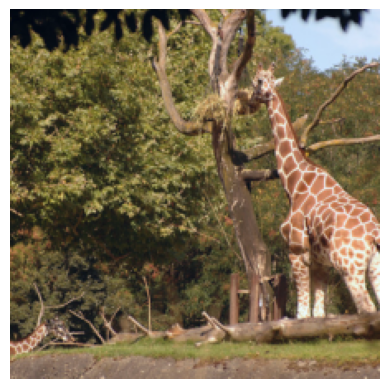

GENERATED: 
 a dog is standing on the grass with a frisbee
REFERENCES:
A collie chasing a frisbee in the grass.
A cute dog is in the grass with a frisbee.
The dog is playing with his toy in the grass
A brown and white dog chasing a blue and yellow frisbee.
A dog that is standing in the grass near a frisbee.



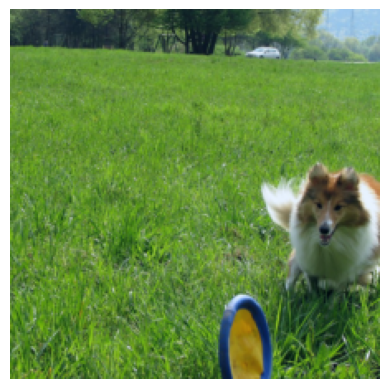

GENERATED: 
 a plate of food that has a bowl of salad and a bowl of fruit
REFERENCES:
A container of food with noodles, broccoli and onions with a beverage on a table. 
A bowl of food that has some broccoli and noodles in it.
This is a dish of broccoli, noodles and potatoes with a soda.
Vegetable stir fry in a bowl next to a drink.
The dish is perfect to fulfill a hungry appetite.



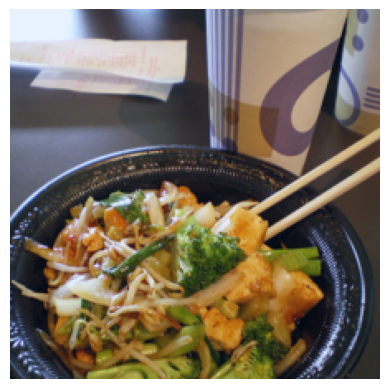

GENERATED: 
 a <unk> <unk> <unk> <unk> in a <unk>
REFERENCES:
a brown and black dog is laying on a roof
A large dog sitting on top of a roof.
A dog is on the roof of a building. 
A dog sitting on the roof of a building next to a satellite dish and a surfboard.
A dog is laying on the eaves of a house with clay pot roofing.



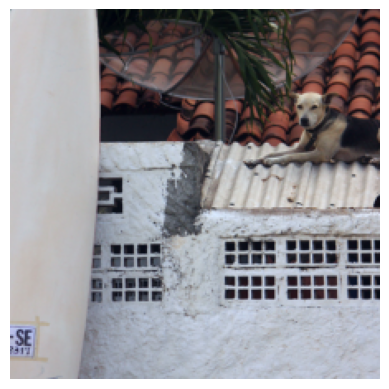

In [195]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
IMAGES_TO_SHOW = 4
idx = 0
with torch.no_grad():
    for i, (image,filename,image_name) in enumerate(test_loader):

        # your code here --->
        features = model(image)  # Get features from the image
        sampled_ids = decoder.sample(features)
        sampled_ids = sampled_ids.cpu().numpy()
        captions_generated = decode_caption(sampled_ids[0], vocab)

        print(f"GENERATED: \n")
        print(captions_generated)
        print("REFERENCES:")
        ref=test_set[test_set['file_name']==image_name[0]]['caption']
        print('\n'.join(ref))
        print("===================================\n")


        timshow(image[0].cpu())
        idx +=1
        if idx == IMAGES_TO_SHOW:
            break

#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions:

* Find the embedding vector of each word in the caption
* Compute the average vector for each caption
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores

Calculate the cosine similarity using the model's predictions over the whole test set.

Display a histogram of the distribution of scores over the test set.

In [189]:
# your code here
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'



9634    000000000025.jpg
9633    000000000025.jpg
9635    000000000025.jpg
9636    000000000025.jpg
9637    000000000025.jpg
              ...       
7325    000000581929.jpg
7324    000000581929.jpg
7323    000000581929.jpg
7322    000000581929.jpg
7321    000000581929.jpg
Name: file_name, Length: 5077, dtype: object

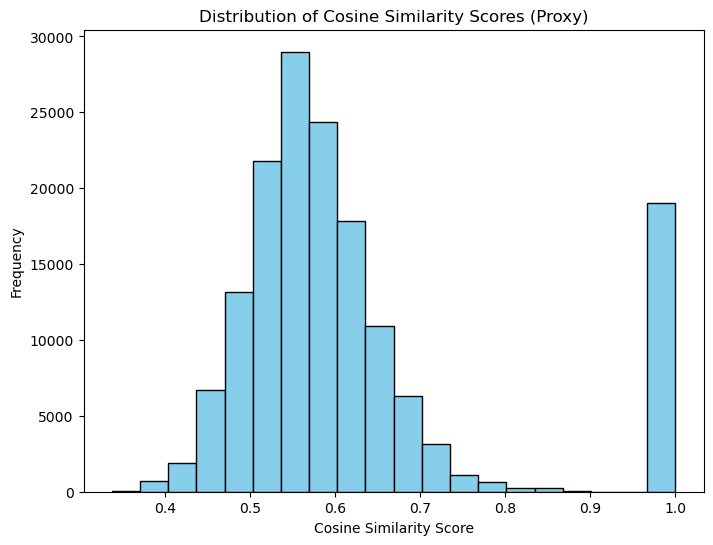

In [209]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
from sklearn.metrics.pairwise import cosine_similarity

def get_reference_captions(file_name):
    return reference_captions.get(file_name, [])
model = model.to('cuda')
model = model.cuda()

decoder = decoder.to('cuda')
decoder = decoder.cuda()

model = model.eval()
decoder = decoder.eval()

cosine_scores = []

with torch.no_grad():
    for image, caption_actual ,imagename in test_loader:
        image = image.to('cuda')
        image = image.cuda()
        features = model(image)
        for i in range(len(features)):
            for j in range(len(features)):
                if i != j:
                    feature_i = features[i].unsqueeze(0).cpu().numpy()
                    feature_j = features[j].unsqueeze(0).cpu().numpy()
                    sim_score = cosine_similarity(feature_i, feature_j)[0][0]
                    cosine_scores.append(sim_score)

plt.figure(figsize=(8, 6))
plt.hist(cosine_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores (Proxy)')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()

##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.